In [1]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log = pm4py.read_xes("Road_Traffic_Fine_Management_Process.xes")

/root/uni-projects/pods/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:55<00:00, 2686.31it/s]


In [3]:
df = pm4py.convert_to_dataframe(log)
df.head(20)

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24 00:00:00+00:00,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05 00:00:00+00:00,NaN,NaN,A1,11.0,NaN,NaN,NaN,NaN
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02 00:00:00+00:00,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12 00:00:00+00:00,NaN,NaN,A100,11.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15 00:00:00+00:00,NaN,NaN,A100,NaN,P,P,NaN,NaN
5,71.5,NaN,NaN,Add penalty,NaN,NaN,complete,2007-03-16 00:00:00+00:00,NaN,NaN,A100,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Send for Credit Collection,NaN,NaN,complete,2009-03-30 00:00:00+00:00,NaN,NaN,A100,NaN,NaN,NaN,NaN,NaN
7,36.0,561,NIL,Create Fine,A,0.0,complete,2007-03-09 00:00:00+00:00,157.0,0.0,A10000,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2007-07-17 00:00:00+00:00,NaN,NaN,A10000,13.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-08-02 00:00:00+00:00,NaN,NaN,A10000,NaN,P,P,NaN,NaN


In [56]:
# rows where matricula is not null
df[df['matricola'].notna()]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
5342,NaN,0,G,Appeal to Judge,NaN,NaN,complete,2008-01-21 00:00:00+00:00,NaN,NaN,A12414,NaN,NaN,NaN,NaN,0.0
10049,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2007-10-09 00:00:00+00:00,NaN,NaN,A14727,NaN,NaN,NaN,NaN,0.0
10916,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2007-01-05 00:00:00+00:00,NaN,NaN,A1516,NaN,NaN,NaN,NaN,0.0
11325,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2008-02-05 00:00:00+00:00,NaN,NaN,A15307,NaN,NaN,NaN,NaN,0.0
12393,NaN,0,G,Appeal to Judge,NaN,NaN,complete,2007-04-24 00:00:00+00:00,NaN,NaN,A1582,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560220,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2002-11-05 00:00:00+00:00,NaN,NaN,V9518,NaN,NaN,NaN,NaN,0.0
560330,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2003-05-22 00:00:00+00:00,NaN,NaN,V9560,NaN,NaN,NaN,NaN,0.0
560360,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2003-05-02 00:00:00+00:00,NaN,NaN,V9576,NaN,NaN,NaN,NaN,0.0
560764,NaN,0,NIL,Appeal to Judge,NaN,NaN,complete,2002-11-01 00:00:00+00:00,NaN,NaN,V9715,NaN,NaN,NaN,NaN,0.0


In [28]:
# show rows where lastSent is 'N'
df[df['lastSent'] == 'N']

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
80668,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2000-09-14 00:00:00+00:00,NaN,NaN,C10036,NaN,P,N,NaN,NaN
80674,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2001-11-22 00:00:00+00:00,NaN,NaN,C10114,NaN,P,N,NaN,NaN
80679,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2001-09-15 00:00:00+00:00,NaN,NaN,C10130,NaN,P,N,NaN,NaN
80686,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2001-01-03 00:00:00+00:00,NaN,NaN,C10158,NaN,C,N,NaN,NaN
80692,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2000-07-09 00:00:00+00:00,NaN,NaN,C10159,NaN,P,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561444,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-10-31 00:00:00+00:00,NaN,NaN,V9992,NaN,P,N,NaN,NaN
561449,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-11-05 00:00:00+00:00,NaN,NaN,V9995,NaN,P,N,NaN,NaN
561457,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-11-04 00:00:00+00:00,NaN,NaN,V9997,NaN,P,N,NaN,NaN
561462,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-10-31 00:00:00+00:00,NaN,NaN,V9998,NaN,P,N,NaN,NaN


In [23]:
df['matricola'].unique()

array([nan,  0.])

In [14]:
df['time:timestamp'].describe()


count                                 561470
mean     2006-03-12 11:07:00.494772224+00:00
min                2000-01-01 00:00:00+00:00
25%                2002-11-12 00:00:00+00:00
50%                2006-02-28 00:00:00+00:00
75%                2009-03-30 00:00:00+00:00
max                2013-06-18 00:00:00+00:00
Name: time:timestamp, dtype: object

In [48]:
# show rows where dismissal is not 'NIL' or NaN
not_nan = df[df['dismissal'].notna()]
not_nil = not_nan[not_nan['dismissal'] != 'NIL']

# dismissal is A
# group by case:concept:name and collect the different values of dismissal along with; showing only those with more than 1 dismissal
grouped = not_nil.groupby('concept:name')['dismissal'].unique()
# grouped[grouped.apply(len) > 1]
grouped


concept:name
Appeal to Judge                                                            [G]
Create Fine                  [N, K, 5, 3, A, I, D, T, E, @, M, Q, F, V, U, ...
Send Appeal to Prefecture                                         [#, D, C, $]
Name: dismissal, dtype: object

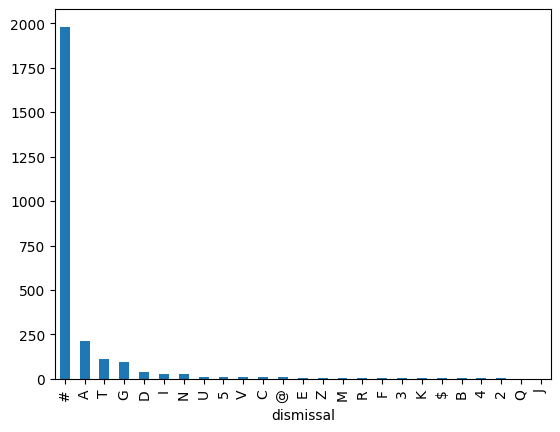

In [19]:
df['dismissal'].unique()

# barchart of dismissal excluding the NaN and 'NIL'
df[df['dismissal'] != 'NIL']['dismissal'].value_counts().plot.bar()
plt.show()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561470 entries, 0 to 561469
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   amount                230230 non-null  float64            
 1   org:resource          150925 non-null  object             
 2   dismissal             155066 non-null  object             
 3   concept:name          561470 non-null  object             
 4   vehicleClass          150370 non-null  object             
 5   totalPaymentAmount    227971 non-null  float64            
 6   lifecycle:transition  561470 non-null  object             
 7   time:timestamp        561470 non-null  datetime64[ns, UTC]
 8   article               150370 non-null  float64            
 9   points                150370 non-null  float64            
 10  case:concept:name     561470 non-null  object             
 11  expense               103987 non-null  float64      

In [4]:
# descriptive analysis
df.describe()


,amount,totalPaymentAmount,article,points,expense,paymentAmount,matricola
count,230230.000000,227971.000000,150370.000000,150370.000000,103987.000000,77601.000000,555.0
mean,63.681656,17.815604,113.246658,0.078879,11.948984,46.410027,0.0
std,89.677991,36.779382,68.219475,0.577687,4.023190,39.345561,0.0
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.0
25%,33.600000,0.000000,7.000000,0.000000,10.000000,33.600000,0.0
50%,38.000000,0.000000,157.000000,0.000000,11.880000,36.000000,0.0
75%,71.500000,35.000000,157.000000,0.000000,13.500000,44.670000,0.0
max,8000.000000,4021.000000,401.000000,10.000000,76.000000,3975.000000,0.0


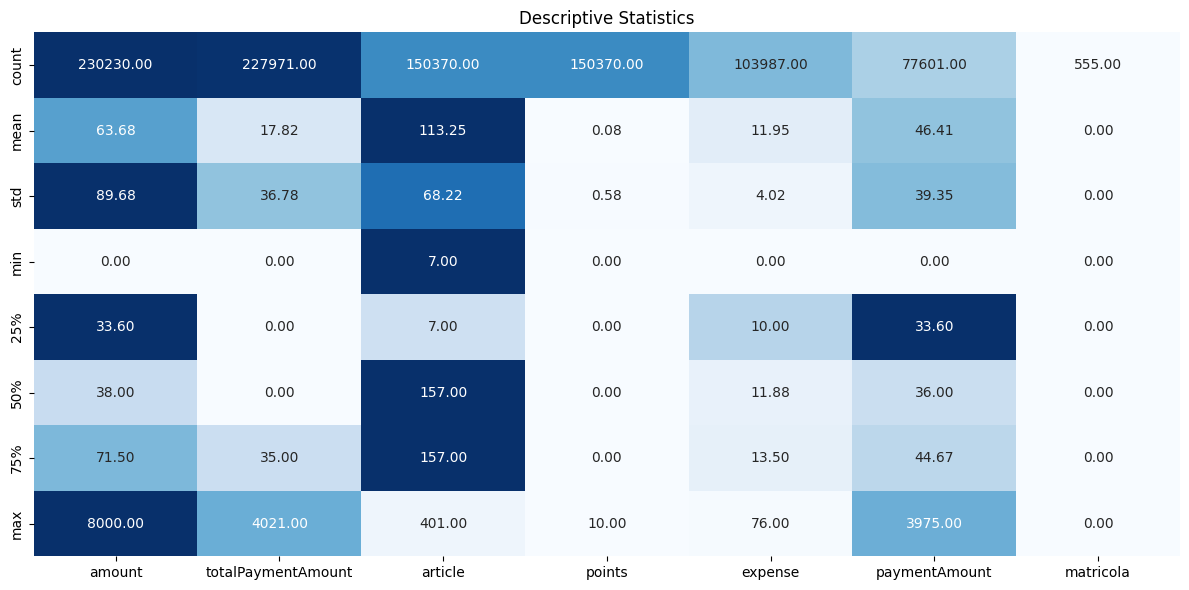

In [9]:
# Plot the heatmap without colorbar
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_desc_stats, annot=desc_stats, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Descriptive Statistics')
plt.tight_layout()
plt.savefig('descriptive_stats_row_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# unique values for each categorical column
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")


org:resource: ['561' nan '537' '550' '541' '557' '558' '559' '0' '536' '560' '562' '563'
 '564' '556' '538' '565' '566' '568' '567' '9' '27' '26' '21' '28' '17'
 '10' '35' '704' '24' '12' '16' '20' '23' '30' '32' '36' '31' '33' '11'
 '29' '34' '22' '828' '817' '826' '821' '813' '829' '807' '825' '818'
 '824' '827' '819' '811' '820' '802' '823' '816' '810' '830' '808' '57'
 '836' '13' '831' '832' '833' '834' '835' '837' '838' '839' '25' '37'
 '850' '53' '54' '46' '55' '42' '39' '40' '56' '45' '49' '51' '843' '845'
 '44' '52' '43' '58' '840' '842' '841' '41' '50' '48' '844' '47' '61' '4'
 '14' '3' '849' '851' '59' '847' '857' '848' '855' '856' '852' '66' '63'
 '65' '62' '858' '846' '861' '546' '540' '548' '552' '554' '555' '553'
 '551' '38' '853' '854' '60' '64' '15' '860' '859' '862' '864' '865' '866'
 '867' '868' '869' '870' '8' '18' '19']
dismissal: ['NIL' nan '#' 'G' 'N' 'K' '5' '3' 'A' 'I' 'D' 'T' 'E' '@' 'M' 'Q' 'F' 'V'
 'U' 'C' 'B' '$' 'Z' 'J' 'R' '2' '4']
concept:name: ['Create F

In [25]:
# function to create a bin chart for numeric variables of the df
def bin_chart(df, variable):
    df[variable].plot.hist(bins=10, alpha=0.5, label=variable)
    plt.legend(loc='upper right')
    plt.show()

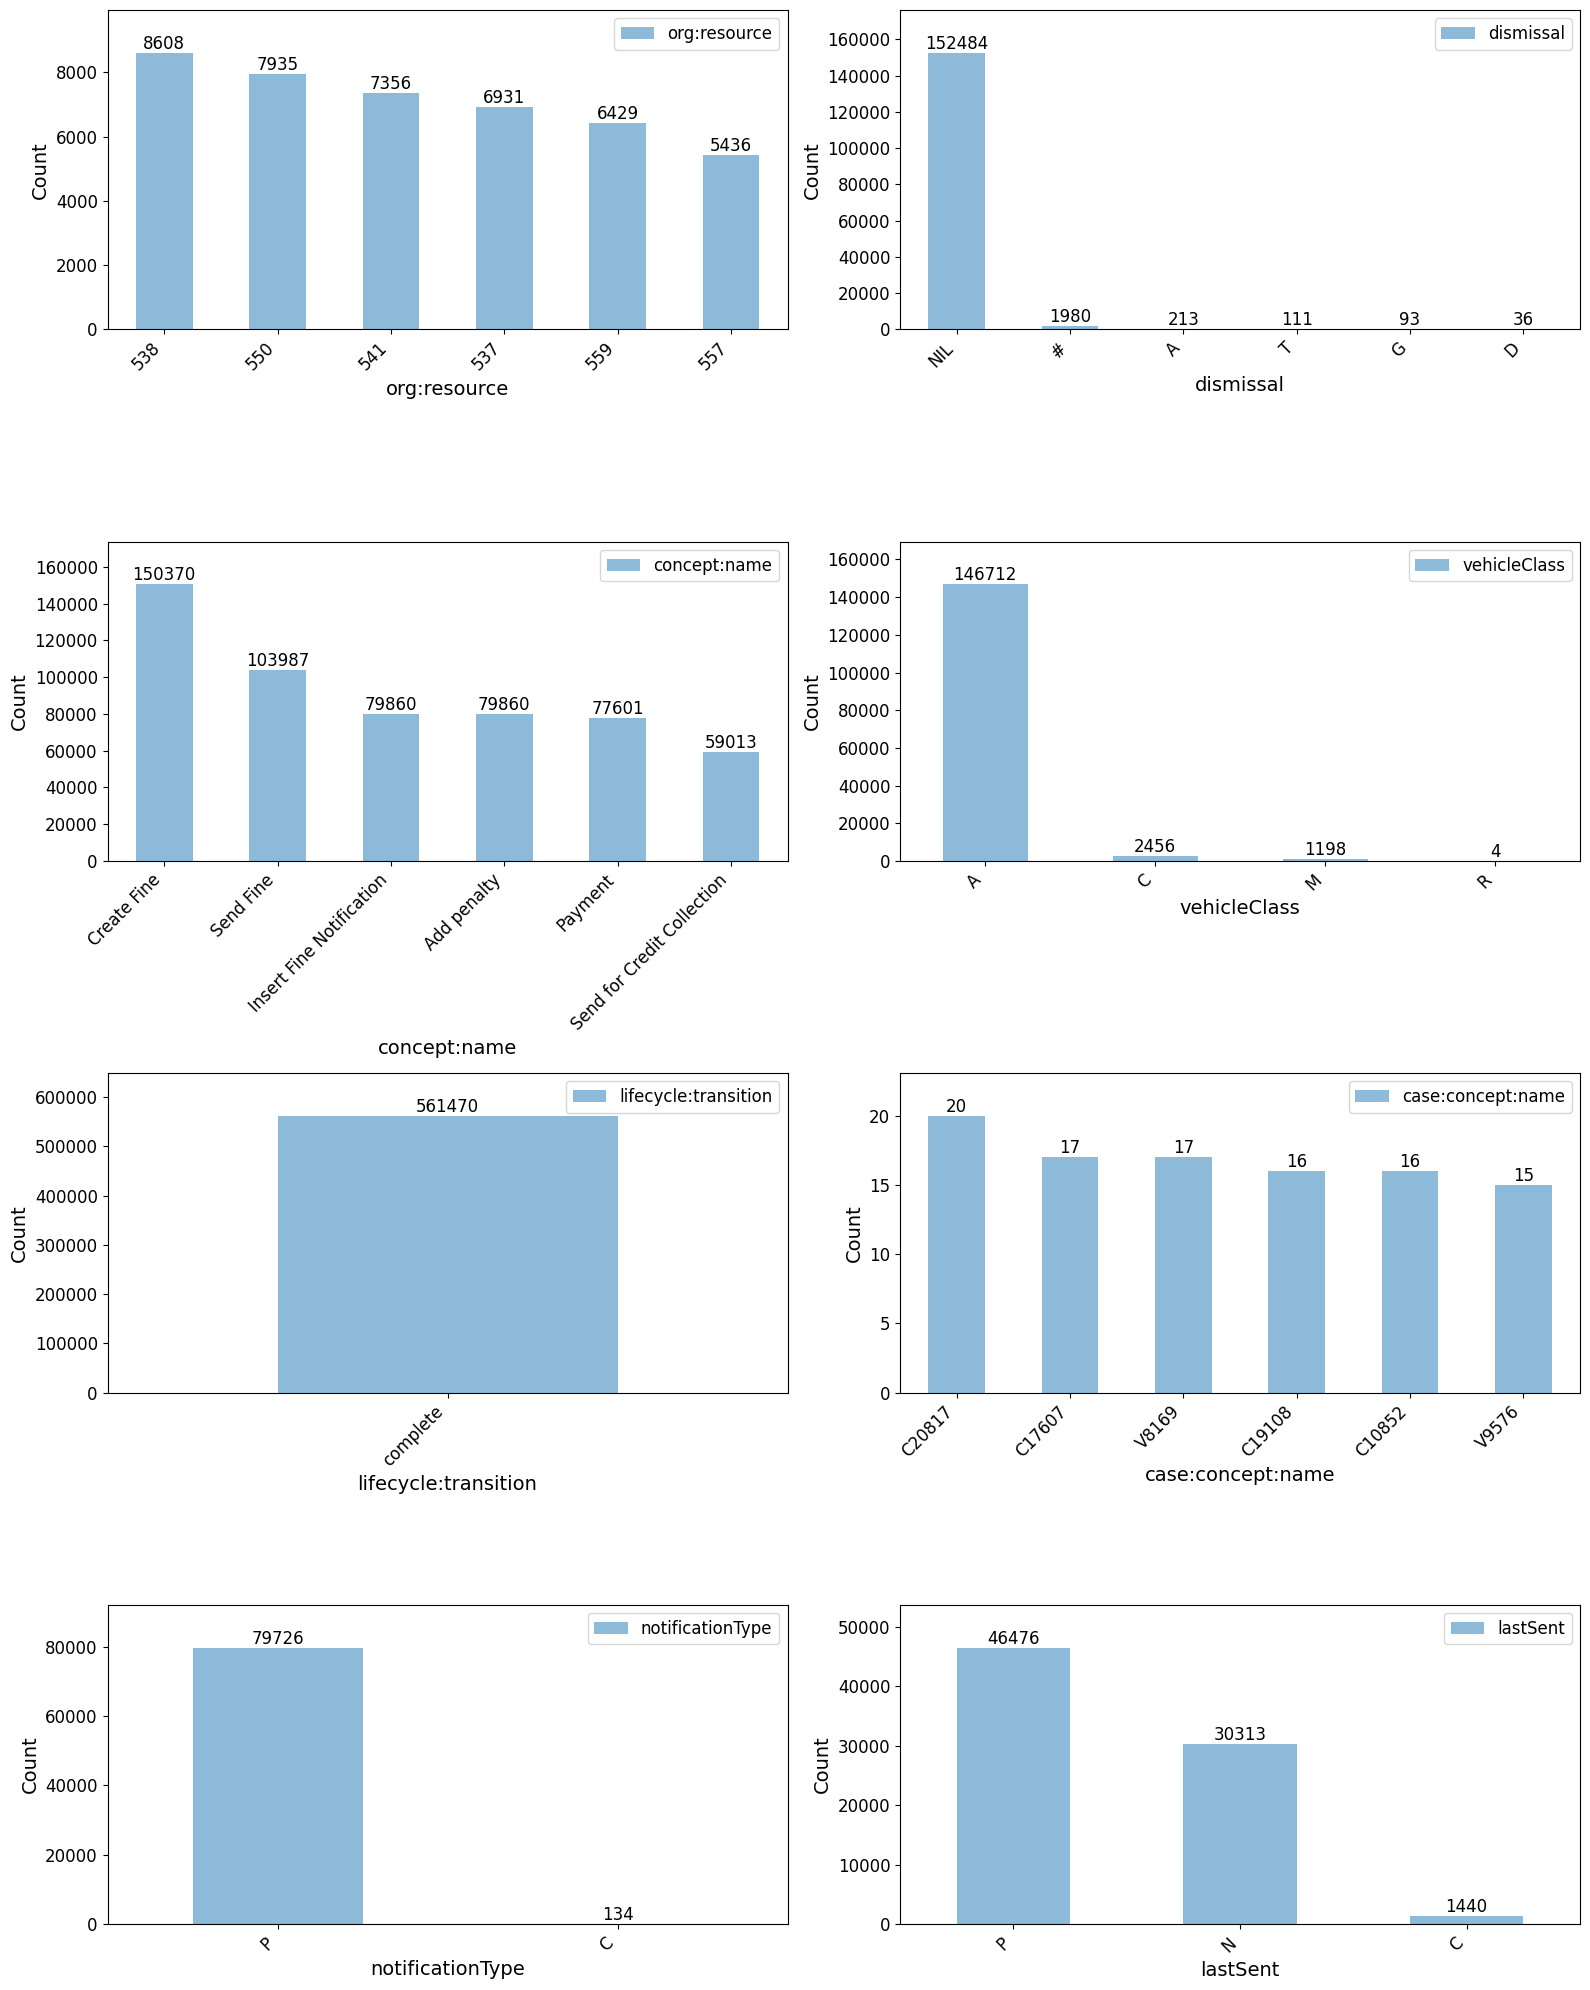

In [54]:
# Create a 4x2 grid for categorical variables
cat_vars = df.select_dtypes(include=['object']).columns
n_vars = len(cat_vars)
n_rows = (n_vars + 1) // 2  # Ceiling division to get number of rows needed

plt.figure(figsize=(16, 5*n_rows))
for i, variable in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    value_counts = df[variable].value_counts().nlargest(6)
    ax = value_counts.plot.bar(alpha=0.5, label=variable)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Add value labels on top of bars with padding
    ylim = plt.ylim()
    plt.ylim(ylim[0], ylim[1] * 1.1)  # Add 10% padding at the top
    for j, v in enumerate(value_counts):
        ax.text(j, v, str(int(v)), ha='center', va='bottom', fontsize=12)
    
    plt.legend(loc='upper right', fontsize=12)

# Adjust layout to prevent label cutoff    
plt.tight_layout()
plt.show()
